## Exercise 1

### 1.A

#### 1

\begin{align*}
y_{i,j} &= d_i(t_{i,j}) + \varepsilon_{i,j}\\
&= d(\alpha_i (t_{i,j} - t_0 - \tau_i) + t_0 ) + \varepsilon_{i,j}\\
&= p_0 + v_0 \alpha_i (t_{i,j} - t_0 - \tau_i) + \varepsilon_{i,j}
\end{align*}

We have :
   - $p_0 \sim \mathcal{N}(\bar{p_0}, \sigma^2_{p_0})$ but is considered fixed in the end (we consider straight lines)
   - $t_0 \sim \mathcal{N}(\bar{t_0}, \sigma^2_{t_0})$, $\sigma^2_{t_0}$ is fixed
   - $v_0 \sim \mathcal{N}(\bar{v_0}, \sigma^2_{v_0})$, $\sigma^2_{v_0}$ is fixed
   - $\tau_i \sim \mathcal{N}(0,\sigma^2_\tau)$
   - $\varepsilon_{i,j} \sim \mathcal{N}(0,\sigma^2)$
   - $\alpha_i = \exp(\xi_i)$, $\xi_i \sim \mathcal{N}(0,\sigma^2_\xi)$

We introduce latent variables $z = (z_i, z_{pop})$ where $z_i = (\alpha_i, \tau_i)$ (we could have consider also ($\xi_i, \tau_i$)) and $z_{pop} = (t_0, v_0)$.

We identify the set of parameters $\theta = (\sigma^2_\tau, \sigma^2_\xi, \sigma^2, \bar{t_0}, \bar{v_0})$.

We introduce a bayesian framework and assume the following :
   - $\bar{t_0} \sim \mathcal{N}(\bar{\bar{t_0}},s^2_{t_0})$
   - $\bar{v_0} \sim \mathcal{N}(\bar{\bar{v_0}},s^2_{v_0})$
   - $\sigma^2_\xi \sim \mathcal{W}^{-1}(v_\xi, m_\xi)$
   - $\sigma^2_\tau \sim \mathcal{W}^{-1}(v_\tau, m_\tau)$
   - $\sigma^2 \sim \mathcal{W}^{-1}(v, m)$

Then we are looking for the log-likelihood :
$$log( \: q(y,z,\theta) \: ) = log( \: q(y|z,\theta) \: ) + log( \: q(z|\theta) \: ) + log( \: q(\theta) \: )$$

Note that $t_0$, $\sigma^2_{t_0}$, $s^2_{t_0}$ and $v_0$, $\sigma^2_{v_0}$, $s^2_{v_0}$ are fixed, we will get rid of constant stuffs since we don't take them into account in the maximization. Also there are $N$ individuals and $k$ measurements for each individuals (or $k_i$ if we consider different numbers of measurements for each individuals).

Notice that $\varepsilon_{i,j}$ are normally distributed, $d_i(t_{i,j})$ are deterministic so that $y_{i,j} \sim \mathcal{N}(d_i(t_{i,j}), \sigma^2)$.

   - $log( \: q(y|z,\theta) \: )$ :

\begin{align*}
log( \: q(y|z,\theta) \: ) &= \sum_{i,j} log( \: q(y_{i,j}| z, \theta) \: )\\
&= \sum_{i,j} log \left( \: \frac{1}{\sqrt{2 \pi \sigma^2}} \exp^{\frac{-1}{2 \sigma^2} (y_{i,j} - d_i(t_{i,j}))^2} \: \right)\\
&= \sum_{i,j} log(1) -\frac{1}{2} log(2 \pi) -\frac{1}{2}log(\sigma^2) - \frac{1}{2 \sigma^2} (y_{i,j} - d_i(t_{i,j}))^2\\
&= \sum_{i,j} -\frac{1}{2}log(\sigma^2) - \frac{1}{2 \sigma^2} (y_{i,j} - d_i(t_{i,j}))^2\\
&= \color{purple}{-\frac{N \times k}{2}log(\sigma^2)} \color{green}{- \frac{1}{2 \sigma^2}} \color{blue}{\sum_{i,j} (y_{i,j} - d_i(t_{i,j}))^2}\\
&= \color{purple}{\psi_1(\theta)} + \color{green}{\varphi_1(\theta)} \color{blue}{S_1(y, z)}
\end{align*}


   - $log( \: q(z|\theta) \: )$ :

\begin{align*}
log( \: q(z|\theta) \: ) &= \sum_{i} log( \: q(z_i, z_{pop}|\theta) \: )\\
&= \sum_{i} log( \: q(z_i|\theta) \: ) + log( \: q(z_{pop}|\theta) \: )\\
&= \sum_{i} log( \: q(\xi_i, \tau_i|\theta) \: ) + log( \: q(t_0, v_0|\theta) \: )\\
&= \sum_{i} log( \: q(\xi_i|\theta) \: ) + log( \: q(\tau_i|\theta) \: ) + log( \: q(t_0|\theta) \: ) + log( \: q(v_0|\theta) \: )\\
&= \sum_{i} - \frac{1}{2}log(\sigma^2_{\xi}) - \frac{1}{2 \sigma^2_{\xi}}(\xi_i)^2 - \frac{1}{2}log(\sigma^2_{\tau}) - \frac{1}{2 \sigma^2_{\tau}}(\tau_i)^2 - \frac{1}{2 \sigma^2_{t_0}}(t_0 - \bar{t_0})^2 - \frac{1}{2 \sigma^2_{v_0}}(v_0 - \bar{v_0})^2\\
&= - \frac{N}{2}log(\sigma^2_{\xi}) - \frac{1}{2 \sigma^2_{\xi}} \sum_{i} (\xi_i)^2 - \frac{N}{2}log(\sigma^2_{\tau}) - \frac{1}{2 \sigma^2_{\tau}} \sum_{i} (\tau_i)^2 - \frac{N}{2 \sigma^2_{t_0}}t_0^2 + \frac{N}{\sigma^2_{t_0}} t_0 \bar{t_0} - \frac{N}{2 \sigma^2_{t_0}}\bar{t_0}^2 - \frac{N}{2 \sigma^2_{v_0}} v_0^2 + \frac{N}{\sigma^2_{v_0}} v_0 \bar{v_0} - \frac{N}{2 \sigma^2_{v_0}} \bar{v_0}^2\\
&= \color{purple}{- \frac{N}{2}log(\sigma^2_{\xi})} \color{green}{- \frac{1}{2 \sigma^2_{\xi}}} \color{blue}{\sum_{i} (\xi_i)^2} \color{purple}{- \frac{N}{2}log(\sigma^2_{\tau})} \color{green}{- \frac{1}{2 \sigma^2_{\tau}}} \color{blue}{\sum_{i} (\tau_i)^2} \color{blue}{+ \frac{N}{\sigma^2_{t_0}} t_0} \color{green}{\bar{t_0}} \color{purple}{- \frac{N}{2 \sigma^2_{t_0}}\bar{t_0}^2} \color{blue}{+ \frac{N}{\sigma^2_{v_0}} v_0} \color{green}{\bar{v_0}} \color{purple}{- \frac{N}{2 \sigma^2_{v_0}} \bar{v_0}^2}\\
&= \color{purple}{\psi_{2.1}(\theta)} + \color{green}{\varphi_{2.1}(\theta)} \color{blue}{S_{2.1}(y,z)} + \color{purple}{\psi_{2.2}(\theta)} + \color{green}{\varphi_{2.2}(\theta)} \color{blue}{S_{2.2}(y,z)} + \color{blue}{S_{2.3}(y,z)} \color{green}{\varphi_{2.3}(\theta)} + \color{purple}{\psi_{2.3}(\theta)} + \color{blue}{S_{2.4}(y,z)} \color{green}{\varphi_{2.4}(\theta)} + \color{purple}{\psi_{2.4}(\theta)}
\end{align*}

   - $log( \: q(\theta) \: )$ :

\begin{align*}
log( \: q(\theta) \: )& =  log( \: q(\theta) \: )\\
&= log( \: q(\theta) \: )\\
&= log( \: q(\sigma^2_\tau, \sigma^2_\xi, \sigma^2, \bar{t_0}, \bar{v_0}) \: )\\
&= log( \: q(\sigma^2_\tau) \: ) + log( \: q(\sigma^2_\xi) \: ) + log( \: q(\sigma^2) \: ) + log( \: q(\bar{t_0}) \: ) + log( \: q(\bar{v_0}) \: )\\
&= log(\frac{1}{\sigma^2_{\tau}}) + m_{\tau} log(\frac{v_{\tau}}{\sigma_{\tau} \sqrt{2}}) - \frac{v^2_{\tau}}{2 \sigma^2_{\tau}} + log(\frac{1}{\sigma^2_{\xi}}) + m_{\xi} log(\frac{v_{\xi}}{\sigma_{\xi} \sqrt{2}}) - \frac{v^2_{\xi}}{2 \sigma^2_{\xi}}\\
&+ log(\frac{1}{\sigma^2}) + m log(\frac{v}{\sigma \sqrt{2}}) - \frac{v^2}{2 \sigma^2}\\
&- \frac{1}{2} log(s^2_{t_0}) - \frac{1}{2 s^2_{t_0}}(\bar{t_0} - \bar{\bar{t_0}})^2 - \frac{1}{2} log(s^2_{v_0}) - \frac{1}{2 s^2_{v_0}}(\bar{v_0} - \bar{\bar{v_0}})^2\\
&= - log(\sigma^2_{\tau}) + m_{\tau} log(v_{\tau}) - m_{\tau} log(\sigma_{\tau}) - \frac{v^2_{\tau}}{2 \sigma^2_{\tau}}\\
&- log(\sigma^2_{\xi}) + m_{\xi} log(v_{\xi}) - m_{\xi} log(\sigma_{\xi}) - \frac{v^2_{\xi}}{2 \sigma^2_{\xi}}\\
&- log(\sigma^2) + m log(v) - m log(\sigma) - \frac{v^2}{2 \sigma^2}\\
&- \frac{1}{2} log(s^2_{t_0}) - \frac{1}{2 s^2_{t_0}}(\bar{t_0} - \bar{\bar{t_0}})^2 - \frac{1}{2} log(s^2_{v_0}) - \frac{1}{2 s^2_{v_0}}(\bar{v_0} - \bar{\bar{v_0}})^2\\
&= - (1 + \frac{m_{\tau}}{2}) log(\sigma^2_{\tau}) - \frac{v^2_{\tau}}{2 \sigma^2_{\tau}}\\
&- (1 + \frac{m_{\xi}}{2}) log(\sigma^2_{\xi}) - \frac{v^2_{\xi}}{2 \sigma^2_{\xi}}\\
&- (1 + \frac{m}{2}) log(\sigma^2) - \frac{v^2}{2 \sigma^2}\\
& - \frac{1}{2 s^2_{t_0}}(\bar{t_0} - \bar{\bar{t_0}})^2 - \frac{1}{2 s^2_{v_0}}(\bar{v_0} - \bar{\bar{v_0}})^2\\
&= \color{blue}{- (1 + \frac{m_{\tau}}{2})} \color{green}{log(\sigma^2_{\tau})} \color{purple}{- \frac{v^2_{\tau}}{2 \sigma^2_{\tau}}}\\
&\color{blue}{- (1 + \frac{m_{\xi}}{2})} \color{green}{log(\sigma^2_{\xi})} \color{purple}{- \frac{v^2_{\xi}}{2 \sigma^2_{\xi}}}\\
&\color{blue}{- (1 + \frac{m}{2})} \color{green}{log(\sigma^2)} \color{purple}{- \frac{v^2}{2 \sigma^2}}\\
& \color{purple}{- \frac{1}{2 s^2_{t_0}}(\bar{t_0} - \bar{\bar{t_0}})^2}\color{purple}{- \frac{1}{2 s^2_{v_0}}(\bar{v_0} - \bar{\bar{v_0}})^2}\\
&= \color{blue}{S_{3.1}(y,z)} \color{green}{\varphi_{3.1}(\theta)} + \color{purple}{\psi_{3.1}(\theta)}\\
&+ \color{blue}{S_{3.2}(y,z)} \color{green}{\varphi_{3.2}(\theta)} + \color{purple}{\psi_{3.2}(\theta)}\\
&+ \color{blue}{S_{3.3}(y,z)} \color{green}{\varphi_{3.3}(\theta)} + \color{purple}{\psi_{3.3}(\theta)}\\
& + \color{purple}{\psi_{3.4}(\theta)} + \color{purple}{\psi_{3.5}(\theta)}\\
\end{align*}

In the end :

\begin{align*}
log( \: q(y,z,\theta) \: ) &= log( \: q(y|z,\theta) \: ) + log( \: q(z|\theta) \: ) + log( \: q(\theta) \: )\\
&= \sum \color{blue}{S(y,z)} \color{green}{\phi(\theta)} + \color{purple}{\psi(\theta)}\\
\end{align*}

Thus, the model belongs to the exponential family.




#### 2

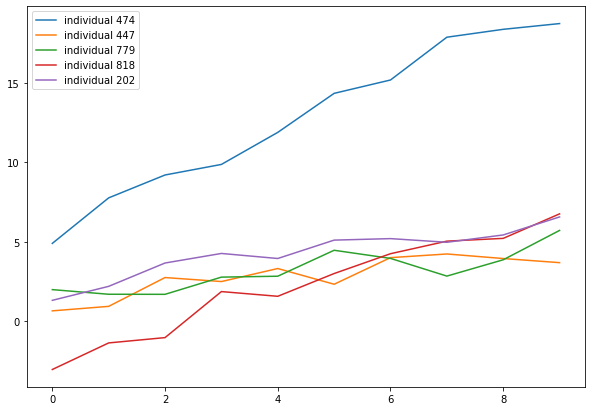

In [7]:
from scipy.stats import invwishart
from matplotlib import pyplot as plt
import numpy as np
from math import *

def generate_data_from_model(N, doublebar_t0, std_t0, sigma_t0, doublebar_v0, std_v0, sigma_v0, m_epsilon, v_epsilon, m_tau, v_tau, m_xi, v_xi):

    # assume there are 10 measurements for each of the i-th individuals :
    k = 10

    # assume measurements are obtained at time t in [1,N] for all individuals :
    t = np.array([ [j for j in range(1,k+1)] for i in range(N)])

    p0 = np.random.normal(2,1)

    bar_t0 = np.random.normal(doublebar_t0, std_t0)
    t0 = np.random.normal(bar_t0, sigma_t0)

    bar_v0 = np.random.normal(doublebar_v0, std_v0)
    v0 = np.random.normal(bar_v0, sigma_v0)

    var_tau = invwishart.rvs(m_tau, v_tau)
    tau = np.random.normal(0, sqrt(var_tau), N)

    var_xi = invwishart.rvs(m_xi, v_xi)
    xi = np.random.normal(0, sqrt(var_xi), N)

    alpha = np.exp(xi)

    var_tau = invwishart.rvs(m_tau, v_tau)

    var_epsilon = invwishart.rvs(m_epsilon, v_epsilon)
    epsilon = np.array([ [np.random.normal(0, sqrt(var_epsilon)) for j in range(k)] for i in range(N) ])

    y = np.array([ [p0 + alpha[i]*v0*(t[i,j] - t0 - tau[i]) + epsilon[i,j] for j in range(k)] for i in range(N) ])

    return y

y = generate_data_from_model(N = 1000, doublebar_t0 = 1, std_t0 = 1, sigma_t0 = 1, doublebar_v0 = 1.5, std_v0 = 1.5, sigma_v0 = 1.5, m_epsilon = 3, v_epsilon = 2, m_tau = 1, v_tau = 0.5, m_xi = 5, v_xi = 1.5)


plt.figure( figsize = (10,7) )

individuals = np.random.randint(0, y.shape[0], 5)
for ind in individuals:
    plt.plot(np.arange(y.shape[1]), y[ind], label=f"individual {ind}")

plt.legend()
plt.show()

### 1.B

#### 3

We consider a multivariate gaussian distribution $\mathcal{N}(z, \sigma_{prop})$. Because it is symetric the acceptance ration rewrites $1 \bigwedge \frac{\pi(z^{*})}{\pi(z^{(k)})}$ where $z^{*}$ is the proposal and $z^{(k)}$ is the current state.

Our target $\pi$ is $q(y,z,\theta)$ so that we will consider $log( \: q(y,z,\theta) \: )$.

In [3]:
initial_z = np.array([xi_i, tau_i, t0, v0])

def Hasting_Metropolis_Sampler(initial_z, maxIter):

    # assume there are 100 measurements for each of the i-th individuals :
    k = 100

    N = 1000

    # assume measurements are obtained at time t in [1,N] for all individuals :
    t = np.array([ [j for j in range(1,k+1)] for i in range(N)])

    sigma_xi, sigma_tau, sigma_t0, sigma_v0 = [1, 1, 1, 1]
    sigma_prop = np.diag( np.array([sigma_xi, sigma_tau, sigma_t0, sigma_v0]) )
    proposal_distribution = np.random.normal(z, sigma_prop)

    var_epsilon = 1
    epsilon = np.array([ [np.random.normal(0, sqrt(var_epsilon)) for j in range(k)] for i in range(N) ])

    # pi(z)/pi(zk) = q(y,z*,theta)/q(y,zk,theta) = q(y|z*,theta).q(z*|theta)/q(y|z*,theta).q(zk|theta)
    # >>> log[pi(z)/pi(zk)] = log[q(y|z*,theta)]+log[q(z*|theta)]-log[q(y|z*,theta)]-log[q(zk|theta)]
    log_ratio_pi = # write the formulas of log(q(...)) according to the computation made earlier

    z = [initial_z] # the list of arrays of z

    for k in range(maxIter):

        proposal_z = proposal_distribution(z[-1], sigma_prop) # should be an array

        u = np.random.uniform()

        if u < np.min(0, log_pi_proposal - log_pi_z):
            z.append(proposal)
        else:
            z.append(z[-1])

    return z

SyntaxError: ignored

#### 4

On cherche $\theta^{(k)}_{MLE} = \underset{\theta \in \Theta}{argmax}\{ <\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} \}$

Remind that our set of parameters is : $\theta = (\sigma^2_\tau, \sigma^2_\xi, \sigma^2, \bar{t_0}, \bar{v_0})$.

\begin{align*}
\nabla_{\sigma^2_\tau}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} &= \nabla_{\sigma^2_\tau} \color{purple}{\psi_{2.2}(\theta)} + \color{green}{\varphi_{2.2}(\theta)} \color{blue}{S_{2.2}(y,z)} + \color{blue}{S_{3.1}(y,z)} \color{green}{\varphi_{3.1}(\theta)} + \color{purple}{\psi_{3.1}(\theta)}\\
&= \nabla_{\sigma^2_\tau} \color{purple}{- \frac{N}{2}log(\sigma^2_{\tau})} \color{green}{- \frac{1}{2 \sigma^2_{\tau}}} \color{blue}{\sum_{i} (\tau_i)^2} + \color{blue}{- (1 + \frac{m_{\tau}}{2})} \color{green}{log(\sigma^2_{\tau})} \color{purple}{- \frac{v^2_{\tau}}{2 \sigma^2_{\tau}}}\\
&= -\frac{N}{2}\frac{1}{\sigma^2_\tau} + \frac{1}{2 (\sigma^2_\tau)^2} \sum_{i} (\tau_i)^2 - (1 + \frac{m_{\tau}}{2}) \frac{1}{\sigma^2_\tau} + \frac{v^2_{\tau}}{2 (\sigma^2_{\tau})^2}\\
\end{align*}

\begin{align*}
&\nabla_{\sigma^2_\tau}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} = 0\\ 
\iff& -\frac{N}{2}\frac{1}{\sigma^2_\tau} + \frac{1}{2 (\sigma^2_\tau)^2} \sum_{i} (\tau_i)^2 - (1 + \frac{m_{\tau}}{2}) \frac{1}{\sigma^2_\tau} + \frac{v^2_{\tau}}{2 (\sigma^2_{\tau})^2} = 0\\
\iff& -\frac{N}{2}\sigma^2_\tau + \frac{1}{2} \sum_{i} (\tau_i)^2 - (1 + \frac{m_{\tau}}{2}) \sigma^2_\tau + \frac{v^2_{\tau}}{2} = 0\\
\iff& \sigma^2_\tau (\frac{N}{2} + 1 + \frac{m_{\tau}}{2}) = \frac{1}{2} \sum_{i} (\tau_i)^2 + \frac{v^2_{\tau}}{2}\\
\iff& \sigma^2_\tau = \frac{\sum_{i} (\tau_i)^2 + v^2_{\tau}}{N + 2 + m_{\tau}}\\
\end{align*}

\begin{align*}
\nabla_{\sigma^2_\xi}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} &= \nabla_{\sigma^2_\xi} \color{purple}{\psi_{2.1}(\theta)} + \color{green}{\varphi_{2.1}(\theta)} \color{blue}{S_{2.1}(y,z)} + \color{blue}{S_{3.2}(y,z)} \color{green}{\varphi_{3.2}(\theta)} + \color{purple}{\psi_{3.2}(\theta)}\\
&= \nabla_{\sigma^2_\xi} \color{purple}{- \frac{N}{2}log(\sigma^2_{\xi})} \color{green}{- \frac{1}{2 \sigma^2_{\xi}}} \color{blue}{\sum_{i} (\xi_i)^2} + \color{blue}{- (1 + \frac{m_{\xi}}{2})} \color{green}{log(\sigma^2_{\xi})} \color{purple}{- \frac{v^2_{\xi}}{2 \sigma^2_{\xi}}}\\
&= -\frac{N}{2}\frac{1}{\sigma^2_\xi} + \frac{1}{2 (\sigma^2_\xi)^2} \sum_{i} (\xi_i)^2 - (1 + \frac{m_{\xi}}{2}) \frac{1}{\sigma^2_\xi} + \frac{v^2_{\xi}}{2 (\sigma^2_{\xi})^2}\\
\end{align*}

\begin{align*}
&\nabla_{\sigma^2_\xi}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} = 0\\ 
\iff& -\frac{N}{2}\frac{1}{\sigma^2_\xi} + \frac{1}{2 (\sigma^2_\xi)^2} \sum_{i} (\xi_i)^2 - (1 + \frac{m_{\xi}}{2}) \frac{1}{\sigma^2_\xi} + \frac{v^2_{\xi}}{2 (\sigma^2_{\xi})^2} = 0\\
\iff& \sigma^2_\xi = \frac{\sum_{i} (\xi_i)^2 + v^2_{\xi}}{N + 2 + m_{\xi}}\\
\end{align*}

\begin{align*}
\nabla_{\sigma^2}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} &= \nabla_{\sigma^2} \color{purple}{\psi_{1}(\theta)} + \color{green}{\varphi_{1}(\theta)} \color{blue}{S_{1}(y,z)} + \color{blue}{S_{3.3}(y,z)} \color{green}{\varphi_{3.3}(\theta)} + \color{purple}{\psi_{3.3}(\theta)}\\
&= \nabla_{\sigma^2} \color{purple}{-\frac{N \times k}{2}log(\sigma^2)} \color{green}{- \frac{1}{2 \sigma^2}} \color{blue}{\sum_{i,j} (y_{i,j} - d_i(t_{i,j}))^2} + \color{blue}{- (1 + \frac{m}{2})} \color{green}{log(\sigma^2)} \color{purple}{- \frac{v^2}{2 \sigma^2}}\\
&= -\frac{N \times k}{2\sigma^2} + \frac{1}{2 (\sigma^2)^2} \sum_{i,j} (y_{i,j} - d_i(t_{i,j}))^2 - (1 + \frac{m}{2})\frac{1}{\sigma^2} + \frac{v^2}{2 (\sigma^2)^2}\\
\end{align*}

\begin{align*}
&\nabla_{\sigma^2}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} = 0\\ 
\iff& -\frac{N \times k}{2}\sigma^2 + \frac{1}{2} \sum_{i,j} (y_{i,j} - d_i(t_{i,j}))^2 - (1 + \frac{m}{2})\sigma^2 + \frac{v^2}{2} = 0\\
\iff& \sigma^2 = \frac{\sum_{i} (y_{i,j} - d_i(t_{i,j}))^2 + v^2}{N \times k + 2 + m}\\
\end{align*}

\begin{align*}
\nabla_{\bar{t_0}}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} &= \nabla_{\bar{t_0}} \color{blue}{S_{2.3}(y,z)} \color{green}{\varphi_{2.3}(\theta)} + \color{purple}{\psi_{2.3}(\theta)} + \color{purple}{\psi_{3.4}(\theta)}\\
&= \nabla_{\bar{t_0}} \color{blue}{\frac{N}{\sigma^2_{t_0}} t_0} \color{green}{\bar{t_0}} \color{purple}{- \frac{N}{2 \sigma^2_{t_0}}\bar{t_0}^2} \color{purple}{- \frac{1}{2 s^2_{t_0}}(\bar{t_0} - \bar{\bar{t_0}})^2}\\
&= \frac{N}{\sigma^2_{t_0}} t_0 - \frac{N}{\sigma^2_{t_0}}\bar{t_0} - \frac{1}{s^2_{t_0}}(\bar{t_0} - \bar{\bar{t_0}})\\
\end{align*}

\begin{align*}
&\nabla_{\bar{t_0}}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} = 0\\ 
\iff& \frac{N}{\sigma^2_{t_0}} t_0 - \frac{N}{\sigma^2_{t_0}}\bar{t_0} - \frac{1}{s^2_{t_0}}(\bar{t_0} - \bar{\bar{t_0}}) = 0\\
\iff& \bar{t_0} = \frac{ \frac{N}{\sigma^2_{t_0}} t_0 + \frac{\bar{\bar{t_0}}}{s^2_{t_0}} }{ \frac{N}{\sigma^2_{t_0}} + \frac{1}{s^2_{t_0}} }\\
\end{align*}

\begin{align*}
\nabla_{\bar{v_0}}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} &= \nabla_{\bar{v_0}} \color{blue}{S_{2.4}(y,z)} \color{green}{\varphi_{2.4}(\theta)} + \color{purple}{\psi_{2.4}(\theta)} + \color{purple}{\psi_{3.5}(\theta)}\\
&= \nabla_{\bar{v_0}} \color{blue}{\frac{N}{\sigma^2_{v_0}} v_0} \color{green}{\bar{v_0}} \color{purple}{- \frac{N}{2 \sigma^2_{v_0}}\bar{v_0}^2} \color{purple}{- \frac{1}{2 s^2_{v_0}}(\bar{v_0} - \bar{\bar{v_0}})^2}\\
&= \frac{N}{\sigma^2_{v_0}} v_0 - \frac{N}{\sigma^2_{v_0}}\bar{v_0} - \frac{1}{s^2_{v_0}}(\bar{v_0} - \bar{\bar{v_0}})\\
\end{align*}

\begin{align*}
&\nabla_{\bar{v_0}}<\color{blue}{S(y,z)} \color{green}{\phi(\theta)}> + \color{purple}{\psi(\theta)} = 0\\ 
\iff& \frac{N}{\sigma^2_{v_0}} v_0 - \frac{N}{\sigma^2_{v_0}}\bar{v_0} - \frac{1}{s^2_{v_0}}(\bar{v_0} - \bar{\bar{v_0}}) = 0\\
\iff& \bar{v_0} = \frac{ \frac{N}{\sigma^2_{v_0}} v_0 + \frac{\bar{\bar{v_0}}}{s^2_{v_0}} }{ \frac{N}{\sigma^2_{v_0}} + \frac{1}{s^2_{v_0}} }\\
\end{align*}

In [ ]:
def MCMC_SAEM(y, initial_guess_theta, maxIter):

    N = y.shape[0]

    # initialisation
    xi_i = np.zeros(N)
    tau_i = np.zeros(N)
    t0 = 0
    v0 = 0

    # (need to define what are the sufficient stats but i run out of time)
    S = np.array([S1, S2, S3, S4, S5]) 

    theta = initial_guess_theta

    z = np.zeros(len(xi_i) + len(tau_i) + 1 + 1)
    z = Hasting_Metropolis_Sampler(z, maxIter)

    for k in range(maxIter):
 
        # simulate new z
        new_z = Hasting_Metropolis_Sampler(z, maxIter)

        # simulate S with new z 
        # (need to define what are the "new" sufficient stats but I run out of time)
        S_with_new_z = np.array([S1_new_z, S2_new_z, S3_new_z, S4_new_z, S5_new_z])

        # stochastic approx of the sufficient stats
        Nb = maxIter/2
        alpha = 0.75
        if k <= Nb:
            step_size = 1
        else:
            step_size = (k - Nb)**(- alpha)

        new_S = S + step_size * (S_with_new_z - S)

        # theta maximization
        sigma_tau =
        sigma_xi =
        sigma =
        bar_t0 =
        bar_v0 =
        theta = [sigma_tau, sigma_xi, sigma, bar_t0, bar_t0]

        z = new_z
        S = new_S

    return theta

### 1.C

I'm running out of time

#### 5

In [ ]:
def Hybrid_Gibbs_Sampler(z):

... that s a good question

#### 6

In [ ]:
def HMwG():

...

#### 7

In [ ]:
def HMwG_SAEM():

... I must admit that at that point I m sailing through trouble waters

#### 8

The Gibbs sampler VS. Block Gibbs sampler :

With Gibbs Sampler, the sampling step consist in updating the latent variable one at a time. This could be very long. If we consider a Metropolis Hastings step (when we cannot recover the conditional distribution of the latent given the other coordinates), computing the update of the latent could be time consuming and last but not least we sometimes reject it !

On the other hand with the Block Gibbs sampler, instead of considering the latent variables one at a time we consider a subset of latent variables where the variables selected have the same shape (the individuals variables on the one hand and the population ones on the other for example). Then we do the same algorithm but group by group so that we do not have as iterations to do as in the case of a simple Gibbs Sampler.

#### 9

In [ ]:
def Block_HMwG_sampler():

## Exercise 2

#### 1

$\epsilon \sim f_{\epsilon}$, $B \sim B(\frac{1}{2})$, h a measurable bounded function.
\begin{align*}
\mathbb{E}[h(Y)] &= \mathbb{E}[h(X \epsilon)|B=1]\mathbb{P}(B=1) + \mathbb{E}[h\left(\frac{X}{\epsilon}\right)|B=0]\mathbb{P}(B=0)\\
&= \frac{1}{2} \mathbb{E}[h(X \epsilon)] + \frac{1}{2} \mathbb{E}[h\left(\frac{X}{\epsilon}\right)]\\
\end{align*}
because $B$ and $\epsilon$ are independent.
\begin{align*}
&= \frac{1}{2} \int_{\mathbb{R}} h(X \epsilon) f_{\epsilon}(\epsilon) d \epsilon + \frac{1}{2} \int_{\mathbb{R}} h\left(\frac{X}{\epsilon}\right) f_{\epsilon}(\epsilon) d \epsilon\\
&= \frac{1}{2} \int_{-1}^1 h(X \epsilon) f_{\epsilon}(\epsilon) d \epsilon + \frac{1}{2} \int_{-1}^1 h\left(\frac{X}{\epsilon}\right) f_{\epsilon}(\epsilon) d \epsilon\\
\end{align*}

We make the following change of variable in the first integral : 
  - $Y = X \epsilon$, 
  - $\epsilon \in [-1,1] \implies Y \in [-X, X]$, 
  - $d \epsilon = \frac{d y}{X}$

And the following one in the second integral : 
  - $Y = \frac{X}{\epsilon}$, 
  - $\epsilon \in [-1,1] \implies Y \in [-\infty, -X] \: \text{for} \: \epsilon < 0, Y \in [X, +\infty] \: \text{for} \: \epsilon > 0$, 
  - $d \epsilon = \frac{d y}{\frac{-X}{\epsilon^2}} = - d y \frac{X}{Y^2}$

\begin{align*}
&= \frac{1}{2} \int_{-X}^X h(Y) \frac{f_{\epsilon}(\frac{Y}{X})}{X} d y - \frac{1}{2} \int_{- X}^{-\infty} h(Y) f_{\epsilon}\left(\frac{X}{Y}\right) \frac{X}{Y^2} d y - \frac{1}{2} \int_{+\infty}^{X} h(Y) f_{\epsilon}\left(\frac{X}{Y}\right) \frac{X}{Y^2} d y\\
&= \frac{1}{2} \int_{-X}^X h(Y) \frac{f_{\epsilon}(\frac{Y}{X})}{X} d y + \frac{1}{2} \int_{-\infty}^{-X} h(Y) f_{\epsilon}\left(\frac{X}{Y}\right) \frac{X}{Y^2} d y + \frac{1}{2} \int_{X}^{+\infty} h(Y) f_{\epsilon}\left(\frac{X}{Y}\right) \frac{X}{Y^2} d y\\
\end{align*}

In the end we get :

$$
q(X,Y) = \left\{
    \begin{array}{ll}
         \frac{1}{2} f_{\epsilon}\left(\frac{X}{Y}\right) \frac{X}{Y^2} & \mbox{for } Y \in (-\infty, -X) \\
        \frac{1}{2} \frac{f_{\epsilon}(\frac{Y}{X})}{X} & \mbox{for } Y \in [-X, X] \\
         \frac{1}{2} f_{\epsilon}\left(\frac{X}{Y}\right) \frac{X}{Y^2} & \mbox{for } Y \in (X, +\infty) \\
    \end{array}
\right.
$$



#### 2

The acceptation ratio is $$\alpha(X_n, Y_{n+1}) = 1 \bigwedge \frac{\pi(Y_{n+1}) q(Y_{n+1}, X_n)}{q(X_n, Y_{n+1}) \pi(X_n)}$$ where $q$ is the proposal distribution to sample a candidate $Y_{n+1}$. We have seen thanks to the balanced equation that the distribution $\pi$ of the chain in that case is invariant.

#### 3

Let us suppose that $\epsilon \sim U_{[-1,1]}$

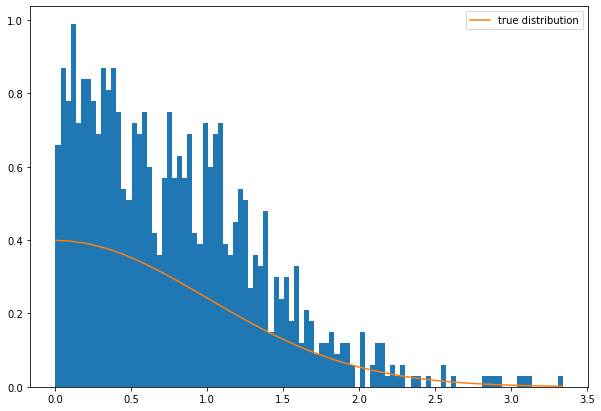

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


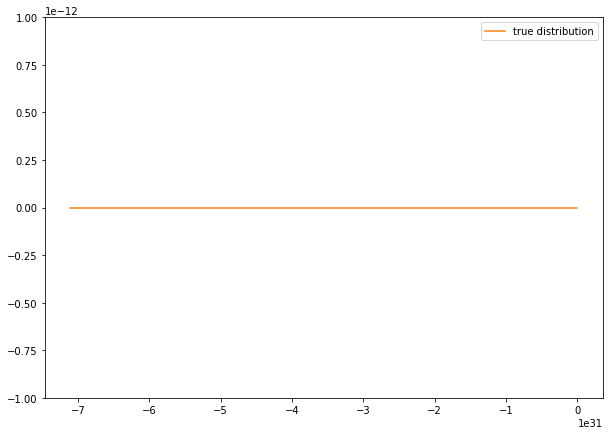

In [6]:
import scipy

def jumping_distribution(x,y):
    if -x < y and y < x:
        f = 1./2 if -1 < y/x and y/x < 1 else 0
        return 1./2 * f / x
    else:
        f = 1./2 if -1 < x/y and x/y < 1 else 0
        return  1./2 * f * (x / y**2)
  
  
def Multiplicative_Hastings_Metropolis(current_state, target_distribution, parameters):

    X = current_state

    for _ in range(1000):
    
        epsilon = np.random.uniform(-1, 1)

        B = np.random.binomial(1, 1/2)

        if B == 1:
            candidate = X*epsilon
        else:
            candidate = X/epsilon

        u = np.random.uniform()

        if u < min(1, (target_distribution(candidate, parameters) * jumping_distribution(candidate,X)) / (jumping_distribution(X,candidate) * target_distribution(X, parameters))):
            X = candidate
    
    return X


def normal_target(x, parameter):
    mean, var = parameter
    return np.exp(-(x - mean)**2/2)/sqrt(2*pi*var)


def exponential_target(x, parameter):
    return parameter * np.exp(- parameter * x)

normal_chain = [ Multiplicative_Hastings_Metropolis(1, normal_target, [0,1]) for _ in range(1000) ]
x_axis = np.linspace(min(normal_chain), max(normal_chain), 100)
true_normal = [ scipy.stats.norm.pdf(x, 0, 1) for x in x_axis ]
plt.figure( figsize=(10,7) )
plt.hist(normal_chain, 100, density=True)
plt.plot(x_axis, true_normal, label = "true distribution")
plt.legend()
plt.show()

# je ne sais pas pourquoi je n'ai que des valeurs positives... et ca ne marche pas avec la loi exponentielle...

exp_chain = [ Multiplicative_Hastings_Metropolis(1, exponential_target, 1) for _ in range(1000) ]
x_axis = np.linspace(min(exp_chain), max(exp_chain), 100)
true_exp = [ scipy.stats.expon.pdf(x, scale = 1) for x in x_axis ]
plt.figure( figsize=(10,7) )
plt.hist(exp_chain, 100, density=True)
plt.plot(x_axis, true_exp, label = "true distribution")
plt.legend()
plt.show()

#### 4

In orange we can see the true normal distribution and in blue the one with our samples.

It matches well ! Nonetheless I cannot make it good for the exponential distribution (I think the values of the exponential goes too far too fast). Also I don't know why but I only have positive values ; there might be a sign error somewhere...